Данный ноутбук является частью проекта "Рекомендательные системы с элементами NLP" команды МОВС ВШЭ

In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import stats

import pandas as pd
import seaborn as sb
import numpy as np
import requests

# Загружаем данные

In [2]:
# Загрузим в ноутбук
!gdown 1I_uFqSR7TiGp7BfKH6wwnpmiBk1ZAzww
!gdown 1CP4deOmpaOqnwdnqZCcZBqpZjBxKDs6l
!gdown 1S0Wz20_d-HV9USfxwqmE4FRtkOovs2XK

Downloading...
From: https://drive.google.com/uc?id=1I_uFqSR7TiGp7BfKH6wwnpmiBk1ZAzww
To: /content/items.csv
100% 31.8M/31.8M [00:01<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CP4deOmpaOqnwdnqZCcZBqpZjBxKDs6l
To: /content/users.csv
100% 29.9M/29.9M [00:00<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S0Wz20_d-HV9USfxwqmE4FRtkOovs2XK
To: /content/interactions.csv
100% 180M/180M [00:03<00:00, 57.6MB/s]


In [3]:
# Просмотры контекта пользователями
items_df = pd.read_csv('/content/items.csv')
items_df.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


In [4]:
# Пользователи
users_df = pd.read_csv('/content/users.csv')
users_df.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [5]:
# Фильмы
interactions_df = pd.read_csv('/content/interactions.csv')
interactions_df.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


# Исследование данных данные

## О пользователях

In [6]:
users_df.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


In [8]:
# Пропуски в данных
users_df.isna().sum()

user_id         0
age         14095
income      14776
sex         13831
kids_flg        0
dtype: int64

In [9]:
p = len(users_df) == users_df['user_id'].nunique()
print(f'Все пользователи уникальные (дублей нет): {p}')

Все пользователи уникальные (дублей нет): True


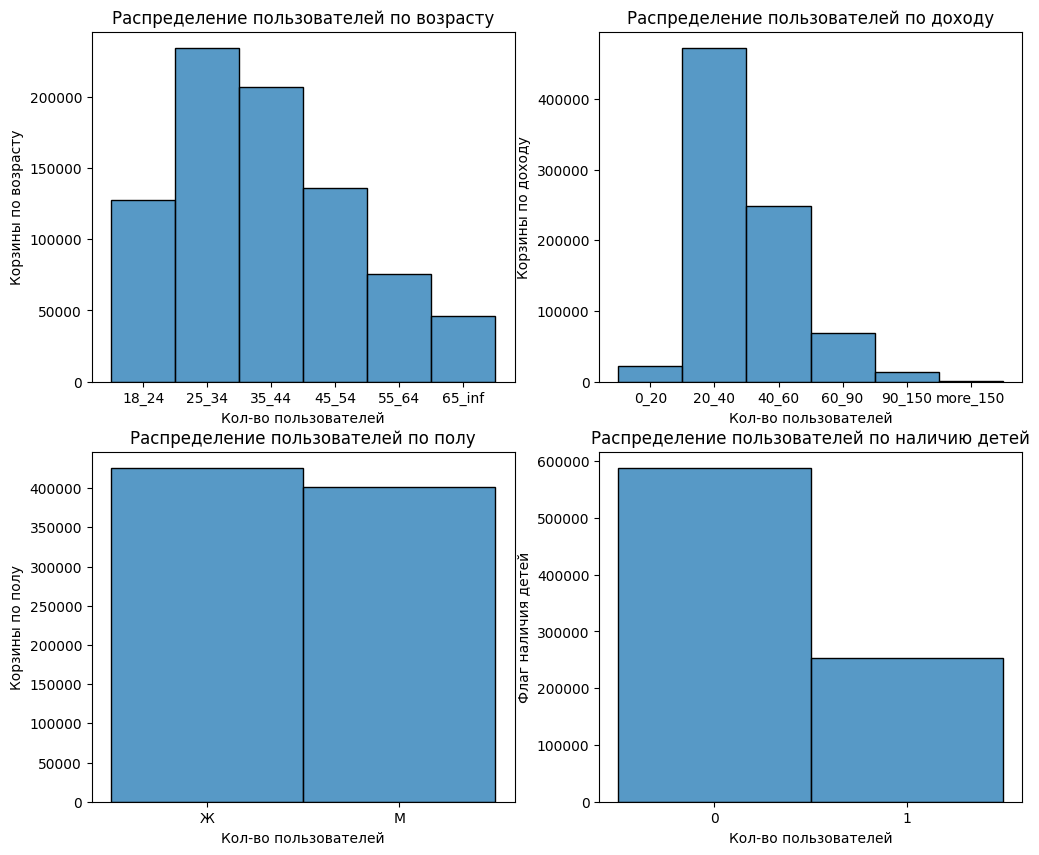

In [10]:
# Создаем фигуру и оси
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Создаем график seaborn на первой подграфике
sb.histplot(users_df[~users_df['age'].isna()]['age'].sort_values().apply(lambda x: str(x)[4:]), ax=ax[0, 0])
ax[0, 0].set_title('Распределение пользователей по возрасту')
ax[0, 0].set_xlabel('Кол-во пользователей')
ax[0, 0].set_ylabel('Корзины по возрасту')
#ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation=45)


# Создаем график seaborn на второй подграфике
sb.histplot(users_df[~users_df['income'].isna()]['income'].replace('income_150_inf','income_more_150').sort_values().apply(lambda x: str(x)[7:]), ax=ax[0, 1])
ax[0, 1].set_title('Распределение пользователей по доходу')
ax[0, 1].set_xlabel('Кол-во пользователей')
ax[0, 1].set_ylabel('Корзины по доходу')

# Создаем график seaborn на третьей подграфике
sb.histplot(users_df[~users_df['sex'].isna()]['sex'].sort_values().apply(lambda x: str(x)), ax=ax[1, 0])
ax[1, 0].set_title('Распределение пользователей по полу')
ax[1, 0].set_xlabel('Кол-во пользователей')
ax[1, 0].set_ylabel('Корзины по полу')


# Создаем график seaborn на четвертой подграфике
sb.histplot(users_df[~users_df['kids_flg'].isna()]['kids_flg'].sort_values().apply(lambda x: str(x)), ax=ax[1, 1])
ax[1, 1].set_title('Распределение пользователей по наличию детей')
ax[1, 1].set_xlabel('Кол-во пользователей')
ax[1, 1].set_ylabel('Флаг наличия детей')

plt.show()

Распределения по возрасту

In [11]:
# Соберем инфу по возрасту в разрезе каждого полу отдельно и вместе для дальнейшей визуализации
man_age = users_df[users_df['sex']=='М'].groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})
wooman_age = users_df[users_df['sex']!='М'].groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})
total_age = users_df.groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})

# Возраст - доход
df_gr = pd.DataFrame(users_df.groupby(['age', 'income'])['user_id'].count()).reset_index()
df_gr['income'] = df_gr['income'].replace('income_150_inf','income_more_150') # для корректной сортировки
df_gr = df_gr.sort_values(['age', 'income'])

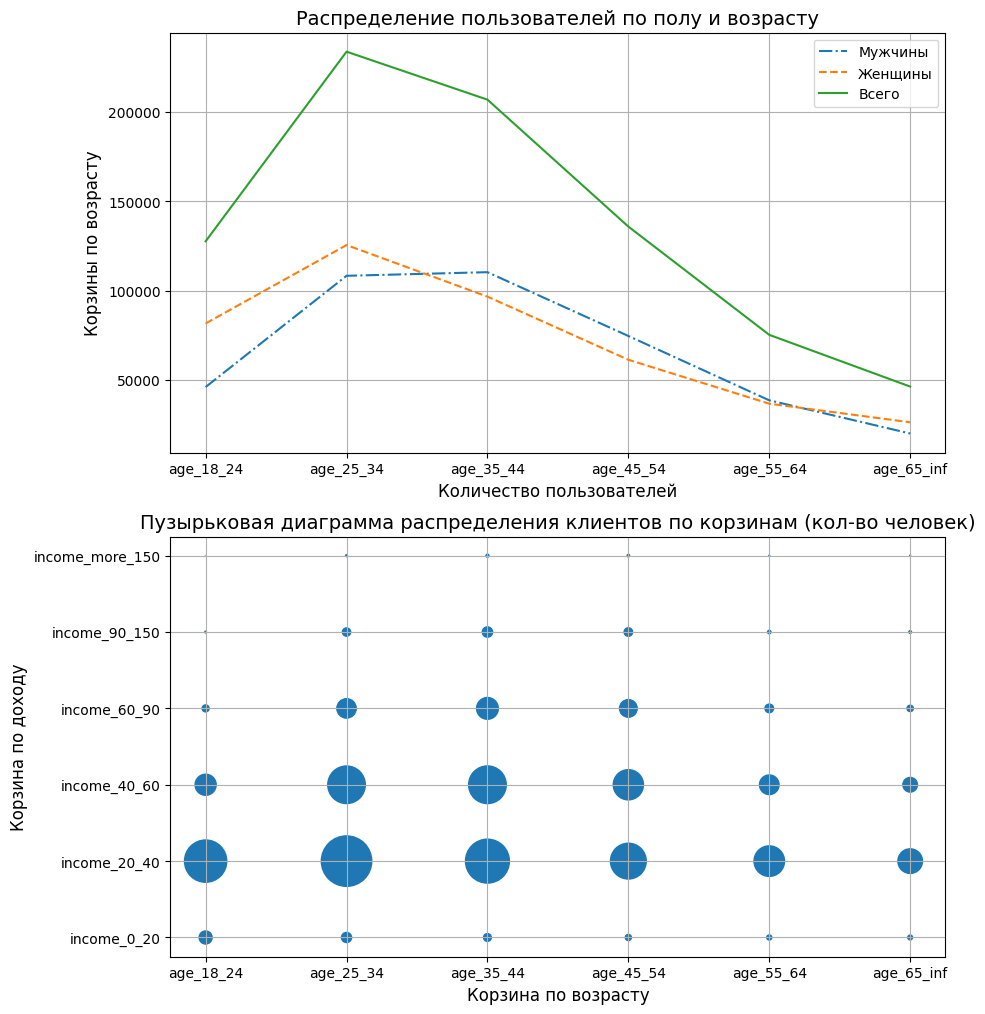

In [12]:
fig, ax = plt.subplots(2,1, figsize=(10,12)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.
#plt.figure(figsize=(10,6))

ax[0].plot(man_age['age'], man_age['cnt'], '-.')
ax[0].plot(wooman_age['age'], wooman_age['cnt'], '--')
ax[0].plot(total_age['age'], total_age['cnt'])

ax[0].set_title('Распределение пользователей по полу и возрасту', fontsize=14)
ax[0].set_xlabel('Количество пользователей', fontsize=12)
ax[0].set_ylabel('Корзины по возрасту', fontsize=12)


ax[0].legend(['Мужчины', 'Женщины', 'Всего'])
ax[0].grid()


ax[1].scatter(df_gr['age'], df_gr['income'], s = df_gr['user_id']/100) # user_id -> cnt clients

ax[1].set_xlabel('Корзина по возрасту', fontsize=12)
ax[1].set_ylabel('Корзина по доходу', fontsize=12)
ax[1].set_title('Пузырьковая диаграмма распределения клиентов по корзинам (кол-во человек)', fontsize=14)

ax[1].grid()

plt.show()

Линейная корреляция признаков

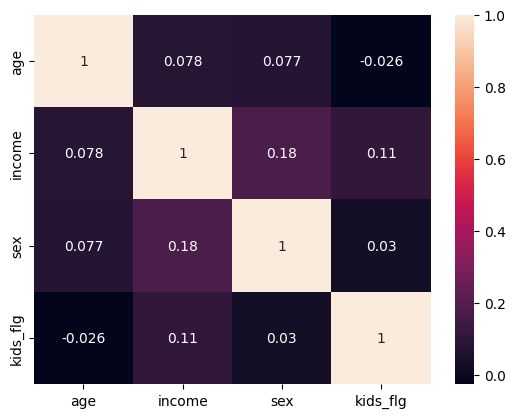

In [13]:
users_heatmap = users_df.copy(deep=True)
users_heatmap.dropna(inplace=True)
users_heatmap = users_heatmap.loc[:, ['age', 'income', 'sex', 'kids_flg']]
users_heatmap.replace(
    {'age_18_24': 1, 'age_25_34': 2, 'age_35_44': 3, 'age_45_54': 4, 'age_55_64':5, 'age_65_inf':6,
     'income_0_20': 1, 'income_20_40': 2, 'income_40_60': 3, 'income_60_90': 4, 'income_90_150':5, 'income_150_inf':6,
     'Ж': 0, 'М': 1}, inplace=True
)

sb.heatmap(users_heatmap.corr(), annot=True, )

plt.show()

Что у нас есть по пользователям в целом?

In [14]:
users_unaiq = list(users_df['user_id'].unique())
interactions_uniq = list(interactions_df['user_id'].unique())

In [15]:
сnt_users_full_info = len(np.intersect1d(interactions_uniq, users_unaiq)) # пересечение клиентов с инфой о себе и инфой о просмотрах
cnt_users_only_in_interaction = len(np.setdiff1d(interactions_uniq, users_unaiq)) # только инфа о просмотрах
cnt_users_only_with_info = len(np.setdiff1d(users_unaiq, interactions_uniq)) # только инфа о юзерах
total_users = сnt_users_full_info + cnt_users_only_in_interaction + cnt_users_only_with_info # юзеров всего

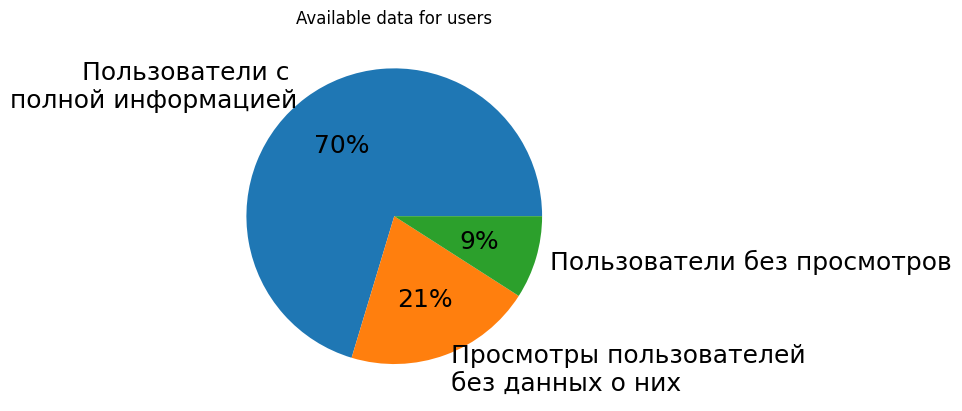

In [16]:
plt.pie(x = [сnt_users_full_info, cnt_users_only_in_interaction, cnt_users_only_with_info],
        labels = ['Пользователи с \nполной информацией', 'Просмотры пользователей \nбез данных о них', 'Пользователи без просмотров'],
        autopct='%.0f%%', textprops={'fontsize': 18})
plt.title('Available data for users')

plt.show()

## О фильмах

In [17]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [18]:
items_num_features = ['release_year', 'for_kids', 'age_rating']
items_cat_features = ['content_type', 'title', 'title_orig', 'genres',
                      'countries', 'studios', 'directors', 'actors',
                      'description', 'keywords']
print(f'Вещественные признаки: {items_num_features}')
print(f'Категориальные признаки: {items_cat_features}')

Вещественные признаки: ['release_year', 'for_kids', 'age_rating']
Категориальные признаки: ['content_type', 'title', 'title_orig', 'genres', 'countries', 'studios', 'directors', 'actors', 'description', 'keywords']


In [19]:
from pandas.core.arrays.integer import Int64Dtype
for feat in items_num_features:
    items_df[feat] = items_df[feat].astype(Int64Dtype())

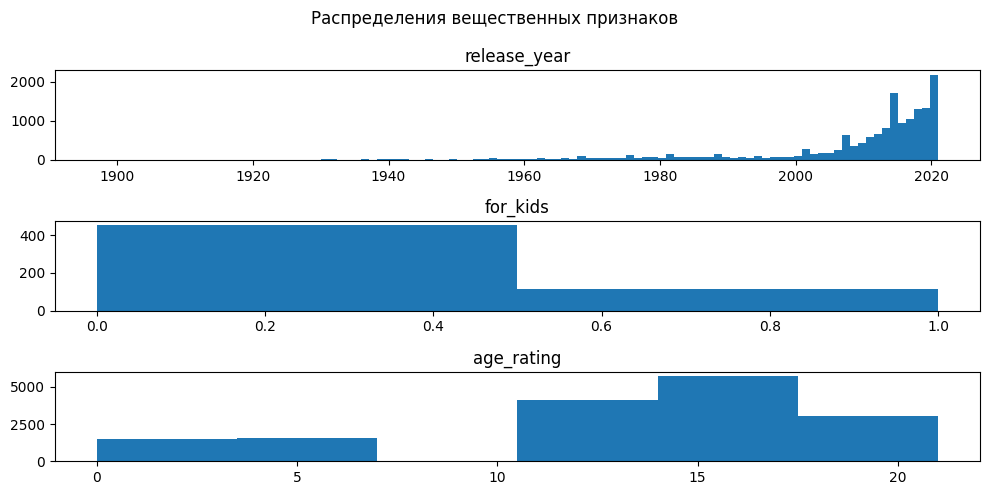

In [20]:
fig, axs = plt.subplots(3, figsize=(10, 5))
fig.suptitle('Распределения вещественных признаков')

for i in range(len(items_num_features)):
    axs[i].hist(items_df[items_df[items_num_features[i]].isna() == False][items_num_features[i]], bins=int(len(items_df[items_num_features[i]].drop_duplicates()) - 1))
    axs[i].set_title(items_num_features[i])
plt.tight_layout()

In [21]:
print(f"Количество дубликатов: {items_df.loc[:, [ 'title', 'title_orig', 'release_year', 'directors']].duplicated().sum()}")

Количество дубликатов: 20


<Axes: title={'center': 'Количество фильмов и сериалов'}>

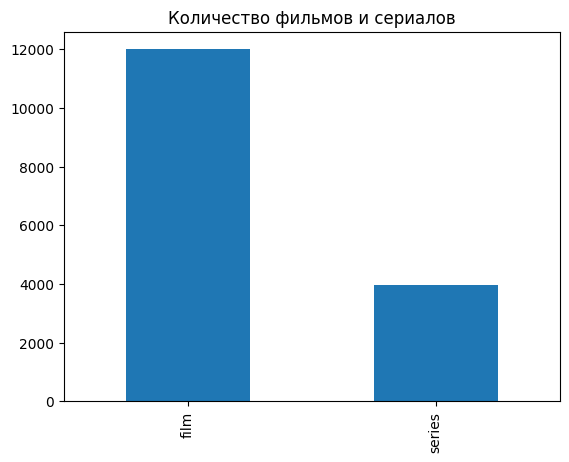

In [22]:
items_df.content_type.value_counts().plot(kind='bar', title='Количество фильмов и сериалов')

In [23]:
genres = items_df['genres'].apply(lambda x: x.split(','))
list_genres = list()

for row in genres:
    list_genres += row

t = pd.DataFrame({
    'films' : list_genres,
})

t['count'] = 1

df_genres = t.groupby(list_genres)['count'].count().reset_index()
print('15 самых частовстречающихся жанров:')
df_genres.sort_values('count', ascending=False).head(15)

15 самых частовстречающихся жанров:


,index,count
99,драмы,4635
26,комедии,3273
20,зарубежные,2498
68,триллеры,2231
34,мелодрамы,2018
53,приключения,1636
87,боевики,1381
135,русские,1251
10,детективы,1052
101,зарубежные,1005


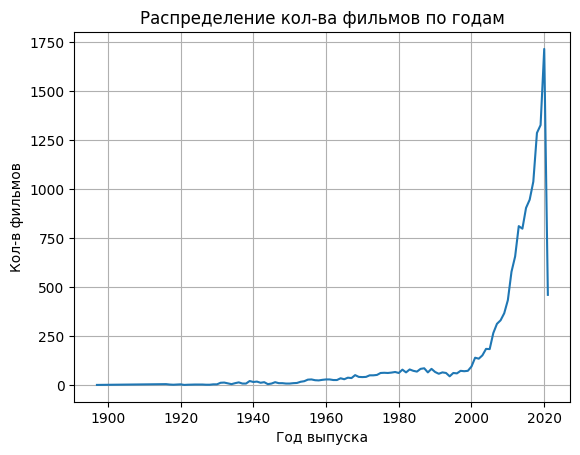

In [24]:
plt.plot(items_df.groupby('release_year')['item_id'].count())

plt.title('Распределение кол-ва фильмов по годам')
plt.ylabel('Кол-в фильмов')
plt.xlabel('Год выпуска')

plt.grid()

In [25]:
print('Режиссеры с большим числом фильмов/сериалов:')
items_df.directors.value_counts()[:10]

Режиссеры с большим числом фильмов/сериалов:


Оливье Шиабоду         511
Денис Франческо         49
Глова Роман Юрьевич     36
Сергей Зарев            29
Альфред Хичкок          28
Бад Фокс                27
Бернар Геррини          26
Стивен Спилберг         25
Андрей Селиванов        22
Эльдар Рязанов          19
Name: directors, dtype: int64

## О взаимодействиях

In [26]:
interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   item_id        int64  
 2   last_watch_dt  object 
 3   total_dur      int64  
 4   watched_pct    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 208.9+ MB


In [27]:
interactions_df.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


In [28]:
print(f'Количество уникальных пользователей со взаимодействиями: {interactions_df.user_id.nunique()}')
print(f'Количество уникальных пользователей/сериалов со всзаимодействиями: {interactions_df.item_id.nunique()}')

Количество уникальных пользователей со взаимодействиями: 962179
Количество уникальных пользователей/сериалов со всзаимодействиями: 15706


In [29]:
usr_int = users_df.merge(interactions_df, how='inner', on='user_id')

interactions_group = usr_int.groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'ttl'})
man_lw = usr_int[usr_int['sex']=='М'].groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'man'})
woman_lw = usr_int[usr_int['sex']!='М'].groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'wman'})

total_lw = interactions_group.merge(man_lw, how='inner', on='last_watch_dt')
total_lw = total_lw.merge(woman_lw, how='inner', on='last_watch_dt')

Первый день в выборке 2021-03-13
Последний день в выборке 2021-08-22


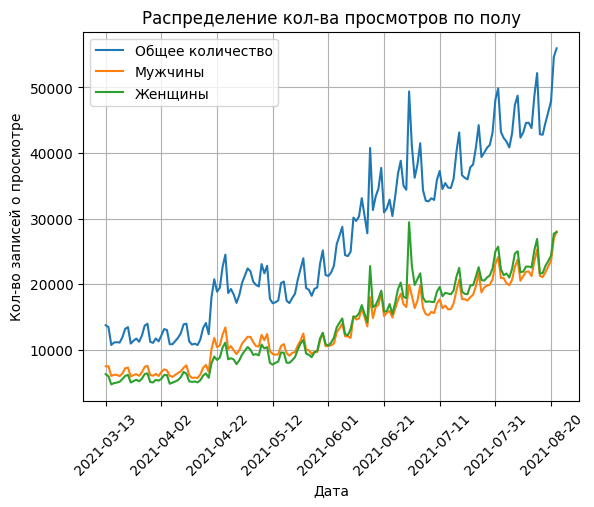

In [30]:
print(f'Первый день в выборке {total_lw["last_watch_dt"].min()}')
print(f'Последний день в выборке {total_lw["last_watch_dt"].max()}')

plt.plot(total_lw.last_watch_dt, total_lw.ttl)
plt.plot(total_lw.last_watch_dt, total_lw.man)
plt.plot(total_lw.last_watch_dt, total_lw.wman)

step = 20  # Устанавливаем шаг между подписями
plt.xticks(range(0, len(total_lw.ttl), step), total_lw.last_watch_dt[::step], rotation=45)  # Где x_values - ваши значения на оси X

plt.title('Распределение кол-ва просмотров по полу')
plt.ylabel('Кол-во записей о просмотре')
plt.xlabel('Дата')

plt.legend(['Общее количество', 'Мужчины', 'Женщины'])

plt.grid()

plt.show()

In [31]:
total_dur_group = usr_int.groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'ttl'})
man_lw = usr_int[usr_int['sex']=='М'].groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'man'})
woman_lw = usr_int[usr_int['sex']!='М'].groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'wman'})

In [32]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 75000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 100000000]
labels = ['0-10к', '10к-20к', '20к-30к', '30к-40к', '40к-50к', '50к-75к','75к-100к','100к-200к','200к-300к','300к-400к'
          ,'400к-500к','500к-750к','750к-1кк','1кк-100кк']

In [33]:
total_dur_group['total_dur_cut'] = pd.cut(total_dur_group['total_dur'], bins=bins, labels=labels, include_lowest=True)
total_dur_group['sec_duratin'] = total_dur_group['ttl']*total_dur_group['total_dur']
total_dur_group = total_dur_group.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'ttl'})

man_lw['total_dur_cut'] = pd.cut(man_lw['total_dur'], bins=bins, labels=labels, include_lowest=True)
man_lw['sec_duratin'] = man_lw['man']*man_lw['total_dur']
man_lw = man_lw.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'man'})

woman_lw['total_dur_cut'] = pd.cut(woman_lw['total_dur'], bins=bins, labels=labels, include_lowest=True)
woman_lw['sec_duratin'] = woman_lw['wman']*woman_lw['total_dur']
woman_lw = woman_lw.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'wman'})

total_td = total_dur_group.merge(man_lw, how='inner', on='total_dur_cut')
total_td = total_td.merge(woman_lw, how='inner', on='total_dur_cut')

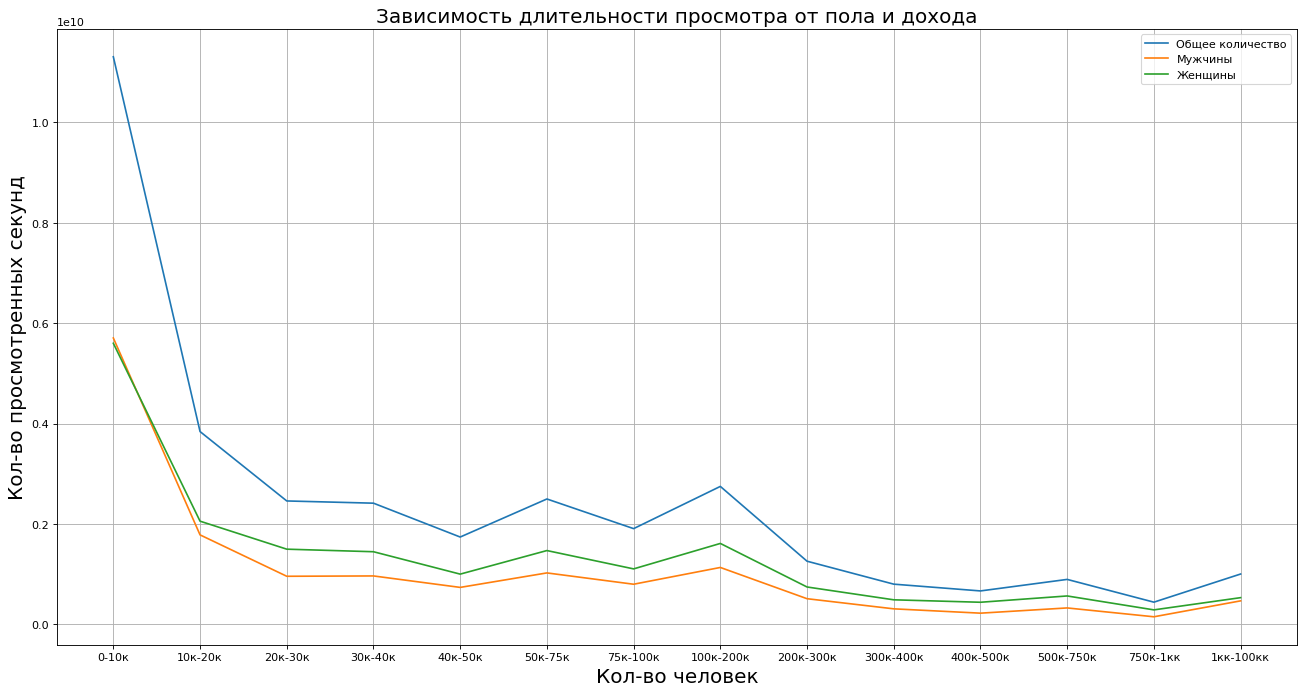

In [34]:
plt.figure(figsize=(20, 10), dpi=80)

plt.plot(total_td.total_dur_cut, total_td.ttl)

plt.plot(total_td.total_dur_cut, total_td.man)

plt.plot(total_td.total_dur_cut, total_td.wman)

#step = 20  # Устанавливаем шаг между подписями
#plt.xticks(range(0, len(total_lw.ttl), step), total_lw.last_watch_dt[::step], rotation=45)  # Где x_values - ваши значения на оси X

plt.title('Зависимость длительности просмотра от пола и дохода', fontsize=18)
plt.ylabel('Кол-во просмотренных секунд', fontsize=18)
plt.xlabel('Кол-во человек', fontsize=18)

plt.legend(['Общее количество', 'Мужчины', 'Женщины'])

plt.grid()

plt.show()

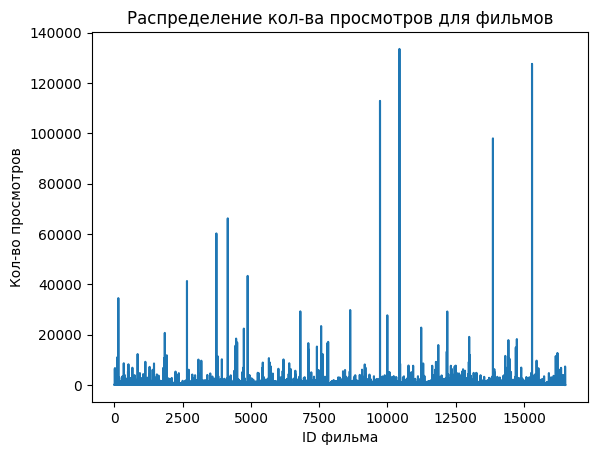

In [35]:
plt.plot(usr_int.groupby('item_id')['user_id'].count())

plt.title('Распределение кол-ва просмотров для фильмов')
plt.ylabel('Кол-во просмотров')
plt.xlabel('ID фильма')

plt.show()

In [36]:
print('10 самых популярных фильмов по числу просмотров')
t = usr_int.groupby('item_id')['user_id'].count()
pd.DataFrame(t).merge(items_df, on='item_id', how='inner').sort_values(['user_id'], ascending=False).iloc[:10, [1,3]]

10 самых популярных фильмов по числу просмотров


,user_id,title
9492,133553,Хрустальный
13899,127620,Клиника счастья
8857,112894,Гнев человеческий
12601,97995,Девятаев
3781,66206,Секреты семейной жизни
3398,60214,Прабабушка легкого поведения
4455,43337,Афера
2418,41307,Подслушано
131,34501,Маша
7851,29773,Белый снег


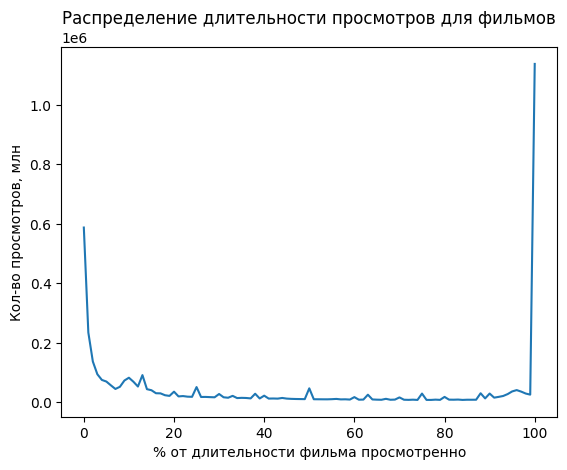

In [37]:
plt.plot(usr_int.groupby('watched_pct')['user_id'].count())

plt.title('Распределение длительности просмотров для фильмов')
plt.ylabel('Кол-во просмотров, млн')
plt.xlabel('% от длительности фильма просмотренно')

plt.show()

In [38]:
pd.DataFrame(t).merge(items_df, on='item_id', how='inner').sort_values(['user_id'], ascending=False).iloc[:10, [1,3]]

,user_id,title
9492,133553,Хрустальный
13899,127620,Клиника счастья
8857,112894,Гнев человеческий
12601,97995,Девятаев
3781,66206,Секреты семейной жизни
3398,60214,Прабабушка легкого поведения
4455,43337,Афера
2418,41307,Подслушано
131,34501,Маша
7851,29773,Белый снег


Если пользователь просмотрел 10 минут от фильма - то он с высокой вероятностью останется его досматривать

## Для взрослых

Посмотрим, много ли смотрят фильмы для взрослых и нужно ли их оставлять в нашем сервисе

In [44]:
adults = (
    interactions_df
    .join(
        items_df[items_df['genres'] == 'для взрослых']['item_id'],
        on=['item_id'],
        how='inner',
        rsuffix='items'
    )
    .drop('item_iditems', axis=1)
)

adults['last_watch_dt'] = adults['last_watch_dt'].apply(pd.to_datetime)
adults['watch_days_ago'] = ((datetime.today() - adults['last_watch_dt']) / np.timedelta64(1, 'D') - 811)

In [40]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190708 entries, 3 to 5399586
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        190708 non-null  int64  
 1   item_id        190708 non-null  int64  
 2   last_watch_dt  190708 non-null  object 
 3   total_dur      190708 non-null  int64  
 4   watched_pct    190702 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.7+ MB


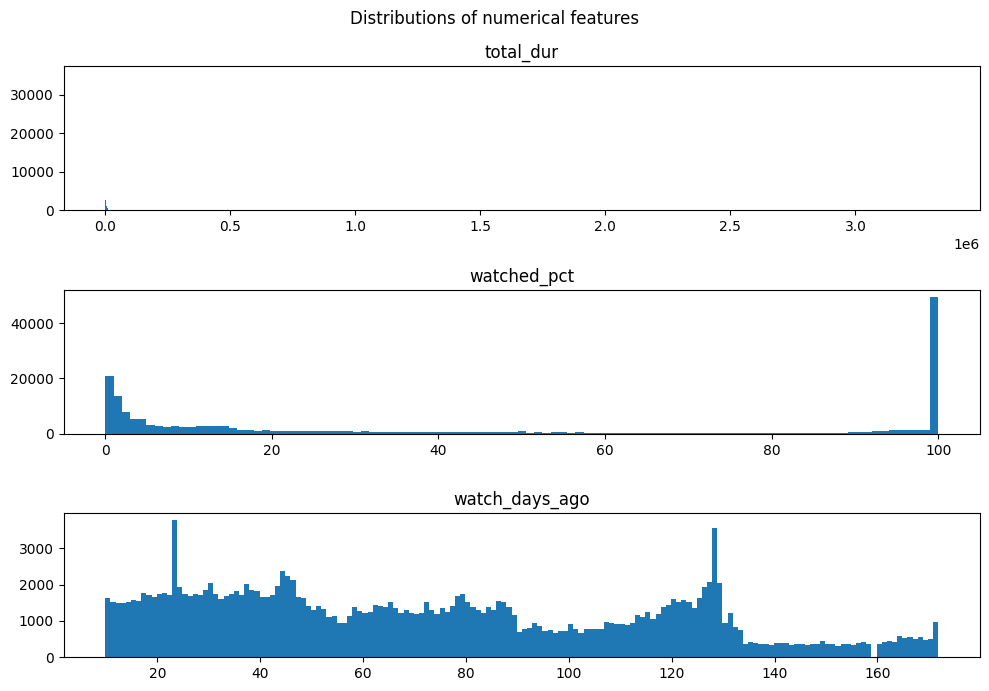

In [45]:
adults_num_feat = ['total_dur', 'watched_pct', 'watch_days_ago']

fig, axs = plt.subplots(3, figsize=(10, 7))
fig.suptitle('Distributions of numerical features')

for i in range(len(adults_num_feat)):
    axs[i].hist(
        adults[adults[adults_num_feat[i]].isna() == False][adults_num_feat[i]],
        bins=int(len(adults[adults_num_feat[i]].drop_duplicates()) - 1)
        )
    axs[i].set_title(adults_num_feat[i])
plt.tight_layout()

<Axes: xlabel='total_dur', ylabel='Count'>

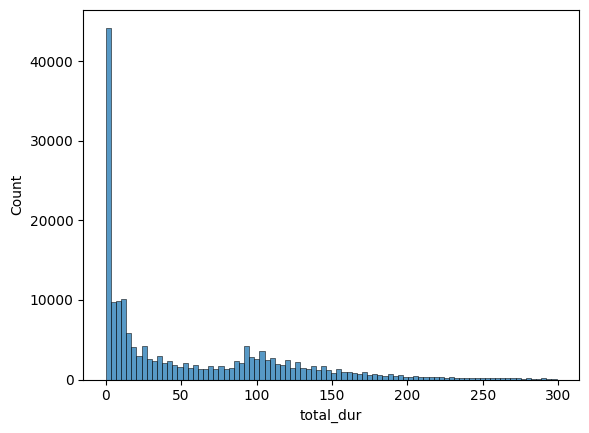

In [46]:
sb.histplot(adults[adults['total_dur'].isna() == False][(adults['total_dur'] // 60) < 300]['total_dur'].apply(lambda x: x // 60))

Вывод: из предоставленной выборки взаимодействий всего лишь 190 000 относятся к контенту для взрослых, удалив данный контент, мы не потеряем нужные данные для обучения. Но можем оставить и сделать наши рекомендации еще разнообразнее))

# Гипотезы

1. У разных возрастных групп разные предпочтения
2. У тех, кто имеет детей, предпочтения отличаются
3. У разных групп по доходу предпочтения отличаются

Ниже там будет что-то типа исследования гипотез

Так как таргет - процент просмотра от фильма, то сделаем его оценку, какая отсечка будет справедливой и сохранит нужные данные. То есть предположим, с какой точки будем считать, что фильм понравился

<Axes: xlabel='watched_pct', ylabel='Count'>

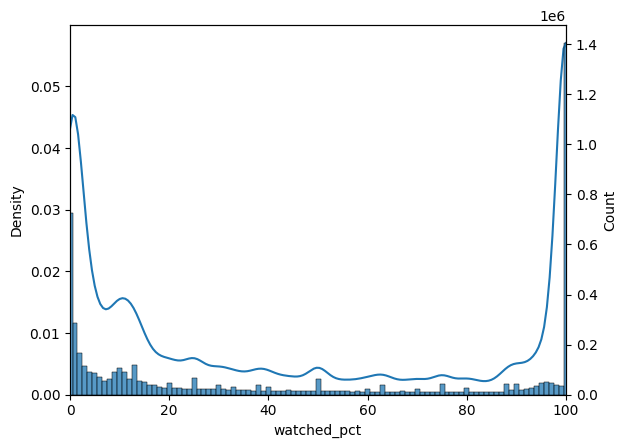

In [47]:
targ_data = interactions_df[interactions_df['watched_pct'].isna() == False][['watched_pct']]

fig, ax1 = plt.subplots()
sb.kdeplot(data=targ_data, x="watched_pct", ax=ax1)
ax1.set_xlim((targ_data["watched_pct"].min(), targ_data["watched_pct"].max()))
ax2 = ax1.twinx()
sb.histplot(data=targ_data, x="watched_pct", discrete=True, ax=ax2)

Вывод: возьмем за отсечку 80%

Датасет для отбора интересов похожих пользователей

In [48]:
users_explor = (
    users_df[['user_id', 'age', 'income', 'sex', 'kids_flg']]
    .join(
        interactions_df[interactions_df['watched_pct'] >= 80]['item_id'],
        on=['user_id'],
        how='inner',
        rsuffix='inter'
    )
    .join(
        items_df[['release_year', 'for_kids', 'age_rating', 'genres', 'countries']],
        on=['item_id'],
        how='inner',
        rsuffix='item'
    )
)

In [49]:
users_explor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288850 entries, 0 to 839650
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       288850 non-null  int64 
 1   age           284010 non-null  object
 2   income        283826 non-null  object
 3   sex           284043 non-null  object
 4   kids_flg      288850 non-null  int64 
 5   item_id       288850 non-null  int64 
 6   release_year  286790 non-null  Int64 
 7   for_kids      13022 non-null   Int64 
 8   age_rating    288850 non-null  Int64 
 9   genres        288850 non-null  object
 10  countries     278225 non-null  object
dtypes: Int64(3), int64(3), object(5)
memory usage: 27.3+ MB


In [50]:
users_explor['for_kids'].value_counts()

0    6921
1    6101
Name: for_kids, dtype: Int64

In [56]:
users_explor['for_kids'] = users_explor['for_kids'].fillna(0)

In [57]:
users_explor['for_kids'].value_counts()

0    282749
1      6101
Name: for_kids, dtype: Int64

In [58]:
users_explor = users_explor.dropna()

In [59]:
users_explor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269757 entries, 0 to 839650
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       269757 non-null  int64 
 1   age           269757 non-null  object
 2   income        269757 non-null  object
 3   sex           269757 non-null  object
 4   kids_flg      269757 non-null  int64 
 5   item_id       269757 non-null  int64 
 6   release_year  269757 non-null  Int64 
 7   for_kids      269757 non-null  Int64 
 8   age_rating    269757 non-null  Int64 
 9   genres        269757 non-null  object
 10  countries     269757 non-null  object
dtypes: Int64(3), int64(3), object(5)
memory usage: 25.5+ MB


In [60]:
users_explor['age'] = users_explor['age'].apply(lambda x: (int(x[4:6]) + int(x[7:9])) / 2 if x != 'age_65_inf' else 65)

In [61]:
users_explor['age'].value_counts()

29.5    76359
39.5    68232
49.5    44721
21.0    41600
59.5    23692
65.0    15153
Name: age, dtype: int64

In [62]:
def inc(x):
    if x == 'income_0_20':
        return 10
    elif x == 'income_150_inf':
        return 200
    elif x == 'income_90_150':
        return 120
    else:
        return (int(x[7:9]) + int(x[10:12])) / 2

In [63]:
users_explor['income'] = users_explor['income'].apply(inc)

In [64]:
users_explor['income'].value_counts()

30.0     153940
50.0      80964
75.0      22652
10.0       7145
120.0      4684
200.0       372
Name: income, dtype: int64

In [65]:
def genre(x):
    lst = x.split(',')
    map(strip(), x.split(','))
    return lst

In [66]:
users_explor['genres'] = users_explor['genres'].apply(lambda x: list(map(str.strip, x.split(','))))

In [67]:
g_lst = users_explor['genres'].to_list()
g_dict = dict()

for film in g_lst:
    for g in film:
        if g in g_dict.keys():
            g_dict[g] += 1
        else:
            g_dict[g] = 1

In [68]:
g_dict = sorted(g_dict.items(), key=lambda item: item[1], reverse=True)

In [69]:
# каких жанров больше
g_dict[:10]

[('комедии', 82887),
 ('драмы', 72845),
 ('мелодрамы', 62002),
 ('зарубежные', 56692),
 ('русские', 41971),
 ('детективы', 36769),
 ('приключения', 29755),
 ('триллеры', 28726),
 ('семейное', 26993),
 ('фэнтези', 25979)]

In [70]:
users_explor.sample(3)

,user_id,age,income,sex,kids_flg,item_id,release_year,for_kids,age_rating,genres,countries
418656,811841,39.5,30.0,Ж,0,12386,2017,0,16,"[зарубежные, триллеры]",Австралия
437676,312592,39.5,50.0,М,0,14576,1974,0,6,"[драмы, мюзиклы, мелодрамы]",СССР
829998,390977,59.5,30.0,М,0,7278,2019,0,16,"[фэнтези, мелодрамы]",Республика Корея


In [71]:
users_explor = users_explor.explode('genres')

In [72]:
users_explor.sample(5)

,user_id,age,income,sex,kids_flg,item_id,release_year,for_kids,age_rating,genres,countries
227605,51688,65.0,75.0,Ж,1,14476,2014,0,18,драмы,США
532596,522526,49.5,30.0,М,0,8874,2010,0,16,мелодрамы,Россия
664730,1038900,29.5,50.0,Ж,0,9213,2011,0,6,хочу всё знать,Украина
274346,1082381,29.5,50.0,Ж,0,1249,2020,0,16,зарубежные,США
339175,339756,59.5,30.0,М,0,6028,2017,0,12,биография,"Великобритания, США"


### 1. Гипотеза про возраст

Попробуем собрать что-то похожее на когорты вручную и подоказывать гипотезы

#### Молодежь (до 30 лет, нет детей, доход не важен)

In [73]:
young_no_kids = users_explor[(users_explor['age'] < 30) & (users_explor['kids_flg'] != 1)]

In [74]:
young_no_kids['genres'].value_counts()[:5]

комедии       27042
драмы         23871
мелодрамы     20203
зарубежные    18475
русские       13768
Name: genres, dtype: int64

In [75]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               29617
Россия            21007
СССР              10230
Франция            5566
Великобритания     3762
Name: countries, dtype: int64

In [76]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    33094
12    24213
18    13671
0      7137
6      6732
21     3180
Name: age_rating, dtype: Int64

In [77]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    86134
1     1893
Name: for_kids, dtype: Int64

Посмотрим: есть ли разница между М и Ж полом

In [78]:
print('М:', (len(young_no_kids[young_no_kids['sex'] == 'М'].drop_duplicates('user_id'))))
print('Ж:', (len(young_no_kids[young_no_kids['sex'] == 'Ж'].drop_duplicates('user_id'))))

М: 37427
Ж: 50600


Не очень равномерно классы распределены, но выводы какие-то делать можно

In [79]:
young_no_kids[young_no_kids['sex'] == 'М']['genres'].value_counts()[:5]

комедии       11512
драмы         10102
мелодрамы      8612
зарубежные     7969
русские        5811
Name: genres, dtype: int64

In [80]:
young_no_kids[young_no_kids['sex'] == 'Ж']['genres'].value_counts()[:5]

комедии       15530
драмы         13769
мелодрамы     11591
зарубежные    10506
русские        7957
Name: genres, dtype: int64

Топ жанров у М и Ж одинаковый в этой когорте, значит он особо не влияет

Вывод: Молодежь без детей предпочитает комедии, драмы, мелодрамы преимущественно Российского и Американского произволства. Тенденция видна.

#### Возраст средний (от 30 до 50 лет, доход не важен)

In [81]:
middles = users_explor[(users_explor['age'] > 30) & (users_explor['age'] < 50)]

In [82]:
middles['genres'].value_counts()[:5]

комедии       34797
драмы         30397
мелодрамы     26020
зарубежные    23788
русские       17660
Name: genres, dtype: int64

In [83]:
middles.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               38002
Россия            27045
СССР              13153
Франция            7250
Великобритания     4776
Name: countries, dtype: int64

In [84]:
middles.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    42412
12    31214
18    17451
0      9288
6      8652
21     3936
Name: age_rating, dtype: Int64

Вывод: У средней возрастной группы комедии сильноо превалируют над остальными жанравми, в отличие от молодежи, у которых комедии и драмы близко друг к другу.

#### Возрастные (от 55 до 65 лет, доход не важен)

In [85]:
seniors = users_explor[(users_explor['age'] > 55)]

In [86]:
seniors['genres'].value_counts()[:5]

комедии       11996
драмы         10464
мелодрамы      8993
зарубежные     8151
русские        6008
Name: genres, dtype: int64

In [87]:
seniors.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               13034
Россия             9299
СССР               4460
Франция            2507
Великобритания     1635
Name: countries, dtype: int64

In [88]:
seniors.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    14483
12    10847
18     5880
0      3184
6      3051
21     1400
Name: age_rating, dtype: Int64

Вывод: У возрастной группы комедии и драмы на одном уровне, что отличает их от средней группы, а также фильмы из США не так сильно опережают Российские + СССР

Вывод: различий в предпочтениях между когортами на основе возраста имеются.  
####*Гипотезу про возраст принимаем*

### Гипотеза про детей

####  Без детей (возраст не важен, доход не важен, пол не важен)

In [89]:
no_kids = users_explor[(users_explor['kids_flg'] != 1)]

In [90]:
no_kids['genres'].value_counts()[:5]

комедии       57266
драмы         50494
мелодрамы     42939
зарубежные    39134
русские       29286
Name: genres, dtype: int64

In [91]:
no_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               62556
Россия            44740
СССР              21705
Франция           11933
Великобритания     7935
Name: countries, dtype: int64

In [92]:
no_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    69990
12    51613
18    28693
0     15248
6     14401
21     6598
Name: age_rating, dtype: Int64

In [93]:
no_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    182501
1      4042
Name: for_kids, dtype: Int64

#### С детьми (возраст не важен, доход не важен, пол не важен)

In [94]:
with_kids = users_explor[(users_explor['kids_flg'] == 1)]

In [95]:
with_kids['genres'].value_counts()[:5]

комедии       25621
драмы         22351
мелодрамы     19063
зарубежные    17558
русские       12685
Name: genres, dtype: int64

In [96]:
with_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               28087
Россия            19729
СССР               9499
Франция            5331
Великобритания     3497
Name: countries, dtype: int64

In [97]:
with_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    31358
12    22798
18    12934
0      6803
6      6342
21     2979
Name: age_rating, dtype: Int64

In [98]:
with_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    81306
1     1908
Name: for_kids, dtype: Int64

Вывод: на наших данных, наличие детей не вносит видимого вклада в предпочтения пользователей. Предпочтения имеют схожую структуру, разница только в кол-ве из-за несбалансированности классов.  
####*Гипотезу про детей отвергаем*

### Гипотеза про доход

In [99]:
low_inc = users_explor[(users_explor['income'] <= 30)]
med_inc = users_explor[(users_explor['income'] >= 50) & (users_explor['income'] <= 75)]
high_inc = users_explor[(users_explor['income'] >= 120)]

print('low:', len(low_inc.drop_duplicates('user_id')))
print('med:', len(med_inc.drop_duplicates('user_id')))
print('high:', len(high_inc.drop_duplicates('user_id')))

low: 161085
med: 103616
high: 5056


Классы очень несбалансированы

In [100]:
low_inc['genres'].value_counts()[:5]

комедии       49367
драмы         43736
мелодрамы     36938
зарубежные    33934
русские       25000
Name: genres, dtype: int64

In [101]:
med_inc['genres'].value_counts()[:5]

комедии       31972
драмы         27795
мелодрамы     23899
зарубежные    21708
русские       16138
Name: genres, dtype: int64

In [102]:
high_inc['genres'].value_counts()[:5]

комедии       1548
драмы         1314
мелодрамы     1165
зарубежные    1050
русские        833
Name: genres, dtype: int64

По жанрам разницы особой нет

In [103]:
low_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               53961
Россия            38410
СССР              18706
Франция           10377
Великобритания     6827
Name: countries, dtype: int64

In [104]:
med_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               34982
Россия            24832
СССР              11882
Франция            6590
Великобритания     4389
Name: countries, dtype: int64

In [105]:
high_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               1700
Россия            1227
СССР               616
Франция            297
Великобритания     216
Name: countries, dtype: int64

По странам также не видно сильной зависимости

In [106]:
low_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    60397
12    44400
18    24858
0     13184
6     12449
21     5797
Name: age_rating, dtype: Int64

In [107]:
med_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    38995
12    28682
18    15997
0      8441
6      7899
21     3602
Name: age_rating, dtype: Int64

In [108]:
high_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16    1956
12    1329
18     772
0      426
6      395
21     178
Name: age_rating, dtype: Int64

По рейтингу также нет видимой разницы. Скорее всего популярные фильмы зачастую имеют рейтинг 16 и 12

Вывод: различий в предпочтениях между когортами на основе дохода не обнаружено.  
####*Гипотезу про доход отвергаем*

# Таргет

В качества таргета рекомендательных систем мы приняли перешния брать призник watched_pct, а точнее его бинарную производную:


Если watched_pct > X, тогда 1 иначе 0

Исследуем X

In [109]:
usr_int_df = users_df.merge(interactions_df, how='inner', on='user_id')

df = usr_int_df.merge(items_df, on='item_id', how='left')

In [110]:
df.head(2)

,user_id,age,income,sex,kids_flg,item_id,last_watch_dt,total_dur,watched_pct,content_type,...,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,973171,age_25_34,income_60_90,М,1,12204,2021-04-25,7361,100.0,film,...,2012,"боевики, драмы, триллеры",США,<NA>,16,NaN,Аллен Хьюз,"Марк Уолберг, Рассел Кроу, Кэтрин Зета-Джонс, ...",История бывшего полицейского Билли Таггерта. 7...,"мэр, расследование, политика, бывший полицейск..."
1,973171,age_25_34,income_60_90,М,1,5471,2021-05-06,91345,16.0,series,...,2004,"драмы, детективы",США,<NA>,16,NaN,"Грег Яйтанс, Деран Сарафян, Дэвид Стрейтон","Хью Лори, Роберт Шон Леонард, Лиза Эдельштейн,...",Гениальный диагност и не очень-то приятный чел...,"анализ, анализ крови, анатомия, анатомия челов..."


In [111]:
# Убедимся, что  унас только фильмы и сериалы
df['content_type'].unique()

array(['film', 'series'], dtype=object)

### Films

In [112]:
film_df = df[df['content_type']=='film'].copy()

In [113]:
print('Медианная продолжительность просмотра фильмов в минутах:', round(film_df['total_dur'].median() / 60))

Медианная продолжительность просмотра фильмов в минутах: 41


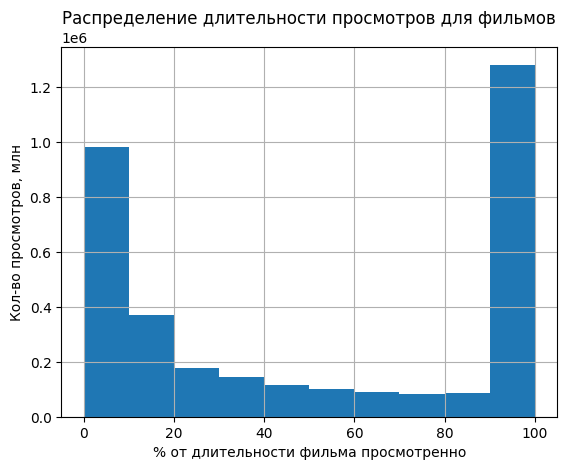

In [114]:
film_df['watched_pct'].hist()

plt.title('Распределение длительности просмотров для фильмов')
plt.ylabel('Кол-во просмотров, млн')
plt.xlabel('% от длительности фильма просмотренно')

plt.show()

In [115]:
# Для примера, возьмем фильм длинной 1:30 (это 90 минут)

precent = [80,90,95,100]

len_full = len(film_df)

for prec in precent:
    len_short = len(film_df[film_df['watched_pct']>=prec])
    part_of_df = round(len_short *100 / len_full,2)

    dur_of_film = 90 * prec / 100

    print(f'Для таргета 1 при watched_pct > {prec} мы получаем долю класса 1: {part_of_df}%')
    print(f'Просмотрено {int(dur_of_film)} мин от фильма длительностью 90 минут')
    print(' ')

Для таргета 1 при watched_pct > 80 мы получаем долю класса 1: 39.89%
Просмотрено 72 мин от фильма длительностью 90 минут
 
Для таргета 1 при watched_pct > 90 мы получаем долю класса 1: 37.33%
Просмотрено 81 мин от фильма длительностью 90 минут
 
Для таргета 1 при watched_pct > 95 мы получаем долю класса 1: 34.65%
Просмотрено 85 мин от фильма длительностью 90 минут
 
Для таргета 1 при watched_pct > 100 мы получаем долю класса 1: 29.76%
Просмотрено 90 мин от фильма длительностью 90 минут
 


Кажется, то, что человек не досмотрел концовку (18 минут) может говорить о том, что фильм "не зашел", при этом 9 и 5 минут могут уходить на субтитры. поэтому предлагаю взять таргет = 1 при watched_pct > 90 или watched_pct > 95 для фильмов

### Series

In [116]:
series_df = df[df['content_type']=='series'].copy()

In [117]:
# Может ли быть такое, что на 1 юзера записанно 2 раза один и тот же сериал?
if max(series_df.groupby(['user_id','item_id']).total_dur.count()) == 1:
  print('На 1 юзера только 1 запись')
else:
  print('Нужно исследовать данные детальнее, просмотров больше, чем 1')

На 1 юзера только 1 запись


In [118]:
print('Медианная продолжительность просмотра сериалов в минутах:', round(series_df['total_dur'].median() / 60))

Медианная продолжительность просмотра сериалов в минутах: 69


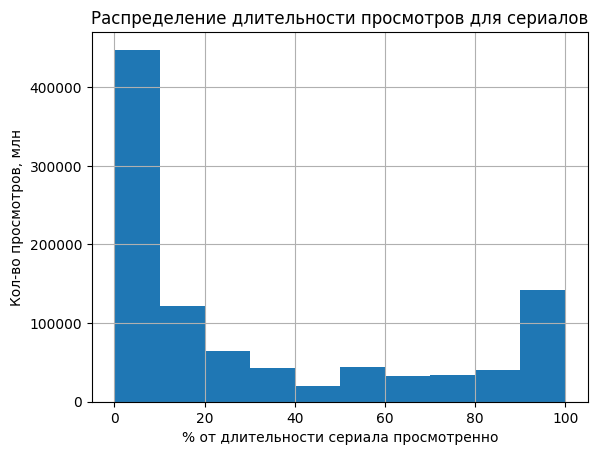

In [119]:
series_df['watched_pct'].hist()

plt.title('Распределение длительности просмотров для сериалов')
plt.ylabel('Кол-во просмотров, млн')
plt.xlabel('% от длительности сериала просмотренно')

plt.show()

In [120]:
# Для примера, возьмем сериала медианной длинны 69 минут

precent = [80,90,95,100]

len_full = len(series_df)

for prec in precent:
    len_short = len(series_df[series_df['watched_pct']>=prec])
    part_of_df = round(len_short *100 / len_full,2)

    dur_of_film = 69 * prec / 100

    print(f'Для таргета 1 при watched_pct > {prec} мы получаем долю класса 1: {part_of_df}%')
    print(f'Просмотрено {int(dur_of_film)} мин от сериала длительностью 69 минут')
    print(' ')

Для таргета 1 при watched_pct > 80 мы получаем долю класса 1: 18.42%
Просмотрено 55 мин от сериала длительностью 69 минут
 
Для таргета 1 при watched_pct > 90 мы получаем долю класса 1: 14.35%
Просмотрено 62 мин от сериала длительностью 69 минут
 
Для таргета 1 при watched_pct > 95 мы получаем долю класса 1: 12.03%
Просмотрено 65 мин от сериала длительностью 69 минут
 
Для таргета 1 при watched_pct > 100 мы получаем долю класса 1: 11.66%
Просмотрено 69 мин от сериала длительностью 69 минут
 


Тут так же считаю, что вполне допустимо взять таргет = 1 при watched_pct > 90 или watched_pct > 95 для фильмов

